In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sentences = [
    "ONCE UPON A TIME there was a farmer and his wife who had one daughter, and she was courted by a gentleman. Every evening he used to come and see her, and stop to supper at the farmhouse, and the daughter used to be sent down into the cellar to draw the beer for supper. So one evening she had gone down to draw the beer, and she happened to look up at the ceiling while she was drawing, and she saw a mallet stuck in one of the beams. And she thought it was very dangerous to have that mallet there, for she said to herself: “Suppose him and me was to be married, and we was to have a son, and he was to grow up to be a man, and come down into the cellar to draw the beer, like as I’m doing now, and the mallet was to fall on his head and kill him, what a dreadful thing it would be!” And she put down the candle and the jug, and sat herself down and began a-crying."
]

# Используем CountVectorizer с бинаризацией
vectorizer = CountVectorizer(binary=True)
one_hot_matrix = vectorizer.fit_transform(sentences).toarray()

# Получаем список слов
vocab = vectorizer.get_feature_names_out()

# Вывод  1 — слово есть в предложении, 0 — нет
import pandas as pd
one_hot_df = pd.DataFrame(one_hot_matrix, columns=vocab)
print("One-hot Encoding Matrix:")
print(one_hot_df)


One-hot Encoding Matrix:
   and  as  at  be  beams  beer  began  by  candle  ceiling  ...  upon  used  \
0    1   1   1   1      1     1      1   1       1        1  ...     1     1   

   very  was  we  what  while  who  wife  would  
0     1    1   1     1      1    1     1      1  

[1 rows x 87 columns]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Вычисляем TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences).toarray()
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf_vocab)
print("TF-IDF Matrix:")
print(tfidf_df)

TF-IDF Matrix:
        and        as        at        be     beams      beer     began  \
0  0.569495  0.031639  0.063277  0.126554  0.031639  0.094916  0.031639   

         by    candle   ceiling  ...      upon      used      very       was  \
0  0.031639  0.031639  0.031639  ...  0.031639  0.063277  0.031639  0.253109   

         we      what     while       who      wife     would  
0  0.031639  0.031639  0.031639  0.031639  0.031639  0.031639  

[1 rows x 87 columns]


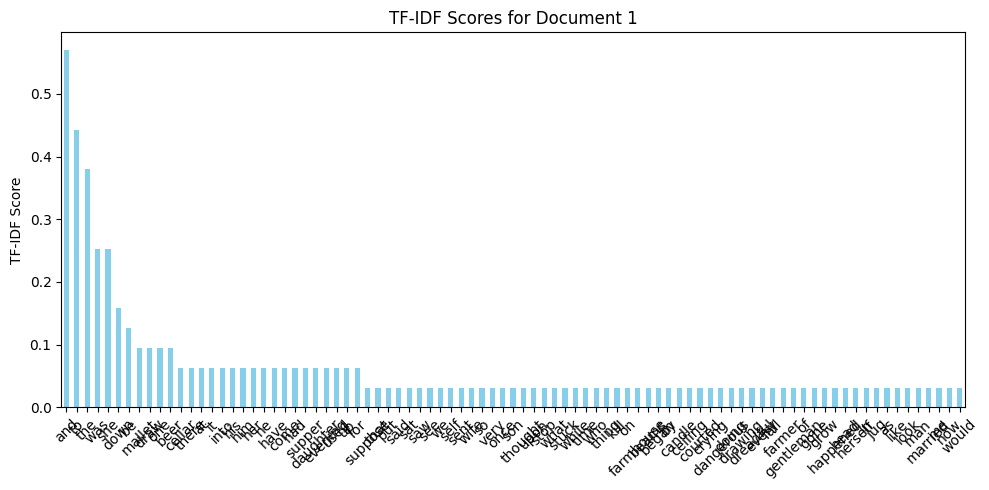

In [ ]:
import matplotlib.pyplot as plt

# Визуализируем TF-IDF одного документа
doc_index = 0
tfidf_scores = tfidf_df.iloc[doc_index]

plt.figure(figsize=(10, 5))
tfidf_scores.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title(f"TF-IDF Scores for Document {doc_index+1}")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

EXERCISE 2

In [ ]:
pip install gensim

In [ ]:
import nltk
nltk.download('punkt_tab')  # download the punkt_tab resource

from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np

nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens = word_tokenize(sentences[0].lower())
tokenized_sentences = [tokens]


In [ ]:
cbow_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=1,
    sg=0,
    epochs=100
)

skipgram_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1,
    epochs=100
)

In [ ]:
word = "beer"

similar_cb = cbow_model.wv.most_similar(word, topn=5)
similar_sg = skipgram_model.wv.most_similar(word, topn=5)

print("CBOW similar to 'beer':")
for w, sim in similar_cb:
    print(f"{w} → {sim:.4f}")

print("\nSkip-gram similar to 'beer':")
for w, sim in similar_sg:
    print(f"{w} → {sim:.4f}")

CBOW similar to 'beer':
and → 0.9987
was → 0.9986
, → 0.9986
to → 0.9986
the → 0.9986

Skip-gram similar to 'beer':
draw → 0.9976
so → 0.9973
into → 0.9970
sent → 0.9967
up → 0.9964


In [ ]:
def visualize(model, words):
    word_vectors = np.array([model.wv[word] for word in words])

    # PCA для уменьшения размерности с 100 → 2
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(word_vectors)

    # t-SNE для лучшей кластеризации
    tsne = TSNE(n_components=2, perplexity=5, n_iter=300, random_state=0)
    tsne_result = tsne.fit_transform(word_vectors)

    # Визуализация
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].scatter(pca_result[:, 0], pca_result[:, 1])
    for i, word in enumerate(words):
        ax[0].annotate(word, (pca_result[i, 0], pca_result[i, 1]))
    ax[0].set_title("PCA")

    ax[1].scatter(tsne_result[:, 0], tsne_result[:, 1])
    for i, word in enumerate(words):
        ax[1].annotate(word, (tsne_result[i, 0], tsne_result[i, 1]))
    ax[1].set_title("t-SNE")

    plt.show()


CBOW Visualization:


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


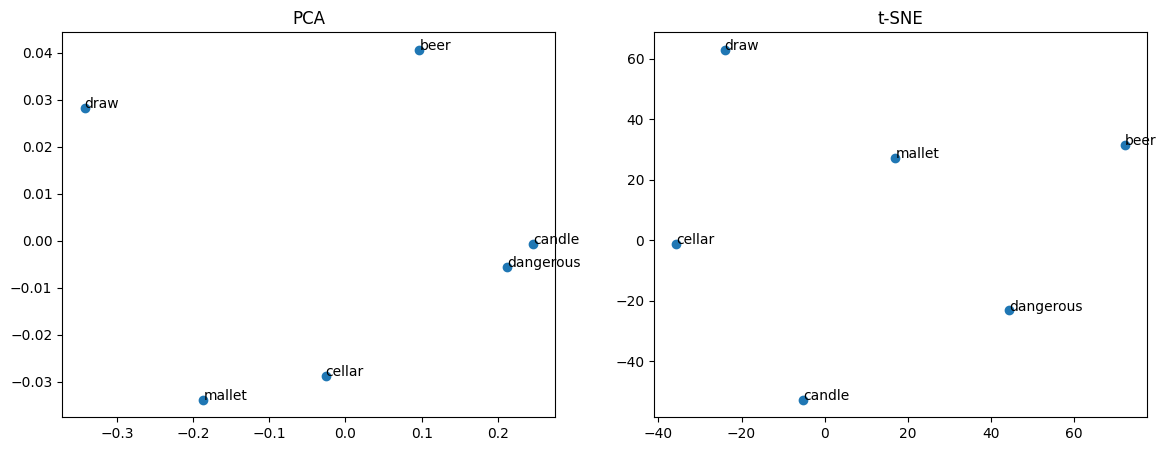

Skip-gram Visualization:


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


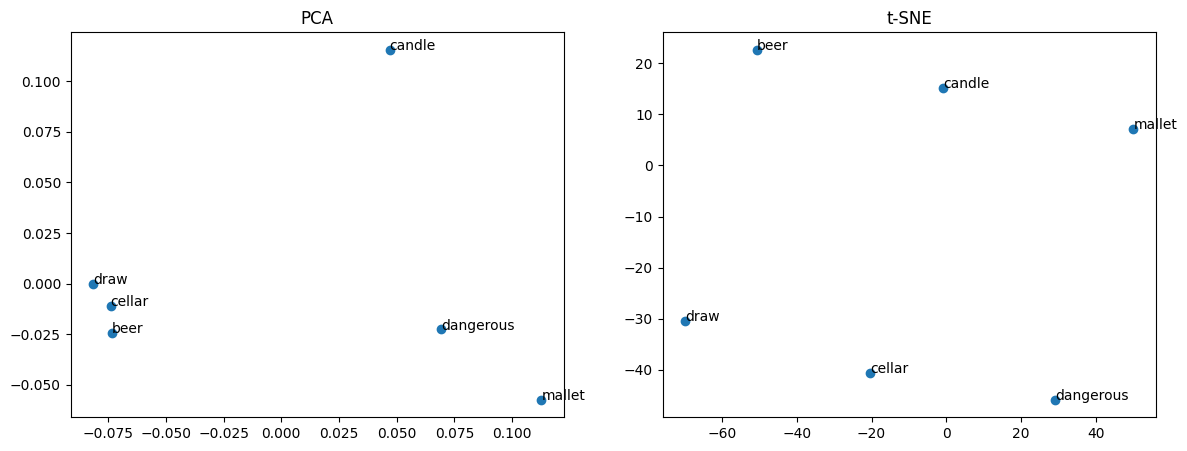

In [ ]:
words_to_visualize = ["beer", "cellar", "draw", "mallet", "dangerous", "candle", "crying"]
# Filter out words not in the model's vocabulary
words_to_visualize = [word for word in words_to_visualize if word in cbow_model.wv.key_to_index] # or skipgram_model.wv.key_to_index for the skipgram model

print("CBOW Visualization:")
visualize(cbow_model, words_to_visualize)

print("Skip-gram Visualization:")
visualize(skipgram_model, words_to_visualize)


EXERCISE 3

In [ ]:
pip install gensim numpy matplotlib

In [ ]:
import numpy as np
import gensim
from gensim.models import FastText, Word2Vec, KeyedVectors
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokens = word_tokenize(sentences[0].lower())
tokenized_sentences = [tokens]

In [ ]:
fasttext_model = FastText(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=1,      # использовать даже редкие слова
    sg=1,             # 1 = Skip-gram (более точная модель, но медленнее)
    epochs=100
)


In [ ]:
w2v_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1,
    epochs=100
)


In [ ]:
target_word = "beer"
fasttext_similar = fasttext_model.wv.most_similar(target_word, topn=5)
w2v_similar = w2v_model.wv.most_similar(target_word, topn=5)


In [ ]:
w2v_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=1, epochs=100)

similar_w2v = w2v_model.wv.most_similar(word, topn=5)
print(f"\nПохожие слова к '{word}' (Word2Vec):")
for w, sim in similar_w2v:
    print(f"{w} → {sim:.4f}")



Похожие слова к 'beer' (Word2Vec):
draw → 0.9976
so → 0.9973
into → 0.9970
sent → 0.9967
up → 0.9964


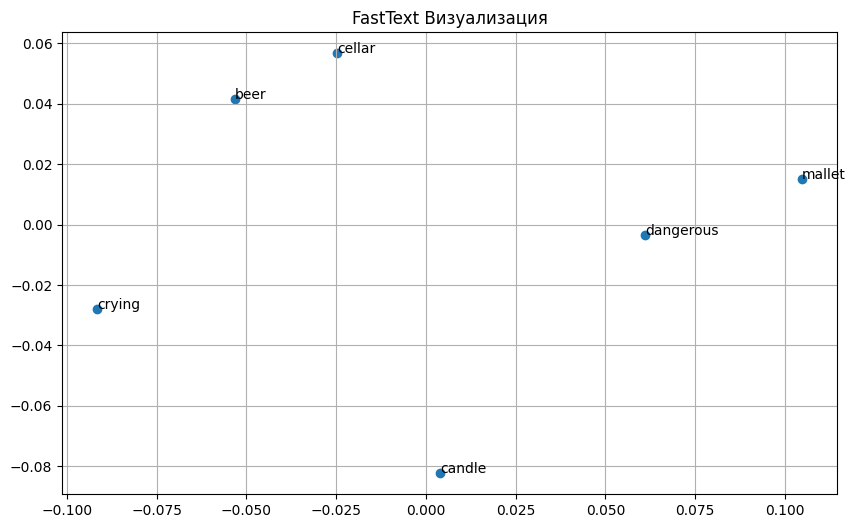

In [ ]:
def visualize_embeddings(model, words, title="Визуализация"):
    vectors = np.array([model.wv[word] for word in words if word in model.wv])
    labels = [word for word in words if word in model.wv]

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1])
    for i, label in enumerate(labels):
        plt.annotate(label, (reduced[i, 0], reduced[i, 1]))
    plt.title(title)
    plt.grid(True)
    plt.show()

words_to_plot = ["beer", "cellar", "mallet", "dangerous", "candle", "crying"]
visualize_embeddings(fasttext_model, words_to_plot, "FastText Визуализация")


In [ ]:
def visualize_embeddings(model, words, title="Визуализация"):
    vectors = np.array([model.wv[word] for word in words if word in model.wv])
    labels = [word for word in words if word in model.wv]

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1])
    for i, label in enumerate(labels):
        plt.annotate(label, (reduced[i, 0], reduced[i, 1]))
    plt.title(title)
    plt.grid(True)
    plt.show()


In [ ]:
words_to_visualize = [target_word] + [w for w, _ in fasttext_similar[:3]] + [w for w, _ in w2v_similar[:3]]


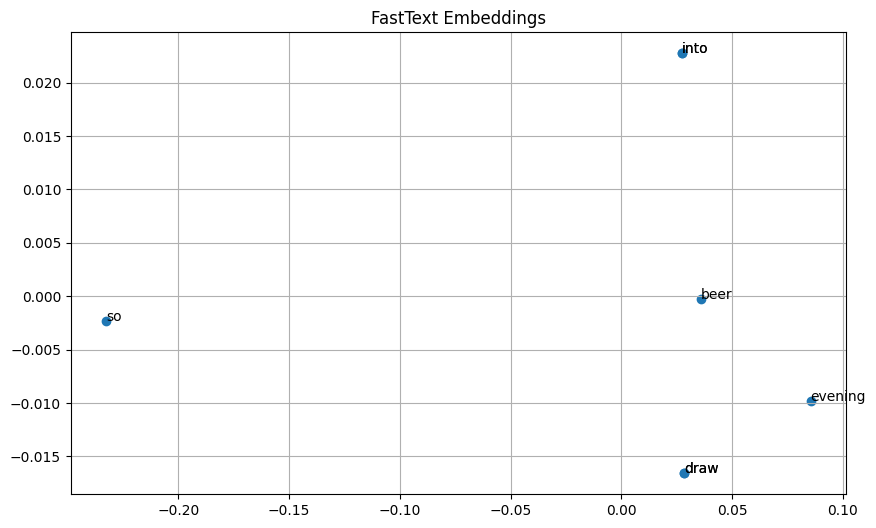

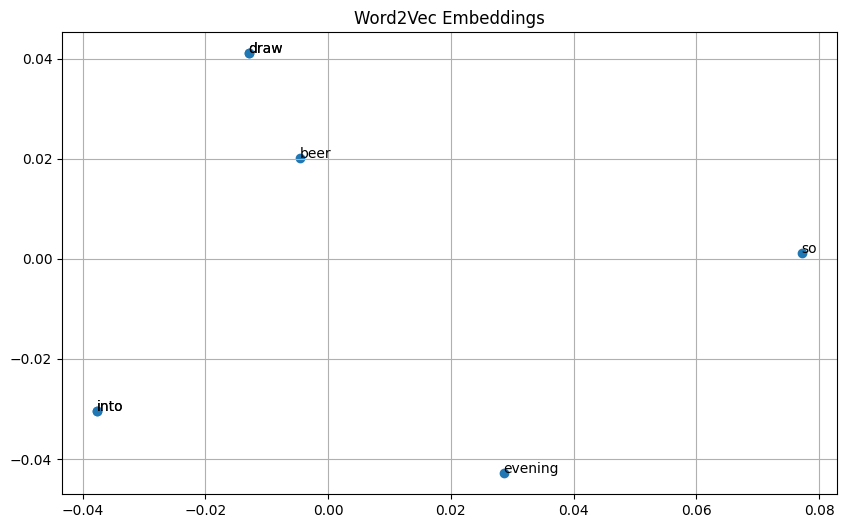

In [ ]:
visualize_embeddings(fasttext_model, words_to_visualize, title="FastText Embeddings")
visualize_embeddings(w2v_model, words_to_visualize, title="Word2Vec Embeddings")


EXERCISE 4

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [ ]:
sentences = [
    "ONCE UPON A TIME there was a farmer and his wife who had one daughter, "
    "and she was courted by a gentleman. Every evening he used to come and see her, "
    "and stop to supper at the farmhouse, and the daughter used to be sent down into the cellar to draw the beer for supper. "
    "So one evening she had gone down to draw the beer, and she happened to look up at the ceiling while she was drawing, "
    "and she saw a mallet stuck in one of the beams. And she thought it was very dangerous to have that mallet there, "
    "for she said to herself: “Suppose him and me was to be married, and we was to have a son, and he was to grow up to be a man, "
    "and come down into the cellar to draw the beer, like as I’m doing now, and the mallet was to fall on his head and kill him, "
    "what a dreadful thing it would be!” And she put down the candle and the jug, and sat herself down and began a-crying."
]
text = sentences[0]

In [ ]:
# Уникальные символы
chars = sorted(list(set(text)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for ch, i in char_to_idx.items()}

# Преобразование в индексы
input_seq = [char_to_idx[ch] for ch in text[:-1]]
target_seq = [char_to_idx[ch] for ch in text[1:]]

# One-hot входы
input_size = len(chars)
inputs = torch.eye(input_size)[input_seq].unsqueeze(1)  # (seq_len, 1, input_size)
targets = torch.tensor(target_seq)

In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out)
        return out

In [ ]:
hidden_size = 128
model = SimpleRNN(input_size, hidden_size, input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

gradient_norms = []

for epoch in range(100):
    optimizer.zero_grad()
    output = model(inputs)
    loss = criterion(output.view(-1, input_size), targets)
    loss.backward()

    grad_norm = model.rnn.weight_hh_l0.grad.norm().item()
    gradient_norms.append(grad_norm)

    optimizer.step()
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Grad norm: {grad_norm:.6f}")


Epoch 0, Loss: 3.7658, Grad norm: 0.180524
Epoch 5, Loss: 2.9560, Grad norm: 0.218666
Epoch 10, Loss: 2.8930, Grad norm: 0.132708
Epoch 15, Loss: 2.8419, Grad norm: 0.090282
Epoch 20, Loss: 2.7713, Grad norm: 0.110931
Epoch 25, Loss: 2.6477, Grad norm: 0.127045
Epoch 30, Loss: 2.6140, Grad norm: 0.643994
Epoch 35, Loss: 2.4464, Grad norm: 0.287800
Epoch 40, Loss: 2.2780, Grad norm: 0.263485
Epoch 45, Loss: 2.1279, Grad norm: 0.204000
Epoch 50, Loss: 1.9755, Grad norm: 0.283860
Epoch 55, Loss: 1.8494, Grad norm: 1.150957
Epoch 60, Loss: 1.6828, Grad norm: 0.774875
Epoch 65, Loss: 1.5292, Grad norm: 0.610550
Epoch 70, Loss: 1.3979, Grad norm: 0.818229
Epoch 75, Loss: 1.2416, Grad norm: 0.736202
Epoch 80, Loss: 1.0936, Grad norm: 0.768511
Epoch 85, Loss: 1.0753, Grad norm: 2.091403
Epoch 90, Loss: 0.9071, Grad norm: 0.989783
Epoch 95, Loss: 0.7858, Grad norm: 0.970464


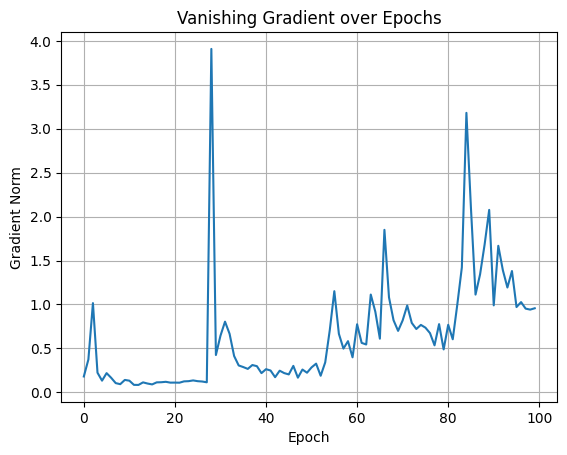

In [ ]:
plt.plot(gradient_norms)
plt.title("Vanishing Gradient over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.grid(True)
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [ ]:
# Синтетические данные: предсказывать 1, если на входе 1
data = [([1]*i + [0]*(10-i)) for i in range(1, 10)]
labels = [1]*len(data)

# Преобразуем в тензоры
data = torch.tensor(data, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)


In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # берём выход с последнего шага
        return out


In [ ]:
model = SimpleRNN(input_size=1, hidden_size=16)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

gradients = []

for epoch in range(100):
    model.zero_grad()
    outputs = model(data.unsqueeze(-1))
    loss = criterion(outputs, labels)
    loss.backward()

    # Захватываем средний градиент скрытого слоя
    grad = model.rnn.weight_hh_l0.grad.abs().mean().item()
    gradients.append(grad)

    optimizer.step()

print("Training completed.")


Training completed.


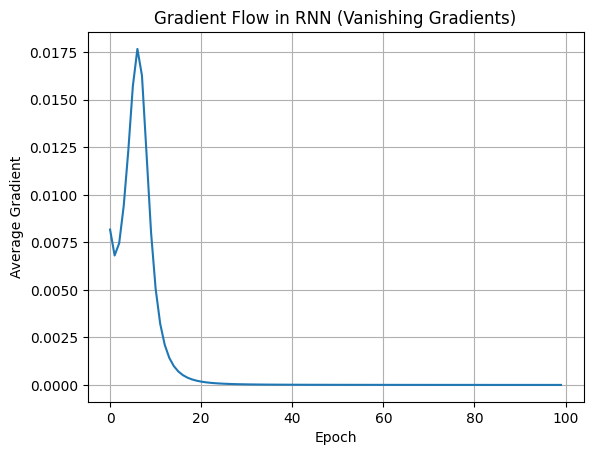

In [ ]:
plt.plot(gradients)
plt.title("Gradient Flow in RNN (Vanishing Gradients)")
plt.xlabel("Epoch")
plt.ylabel("Average Gradient")
plt.grid(True)
plt.show()


EXERCISE 5

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [ ]:
chars = sorted(list(set(text)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for ch, i in char_to_idx.items()}

input_seq = [char_to_idx[ch] for ch in text[:-1]]
target_seq = [char_to_idx[ch] for ch in text[1:]]


In [ ]:
input_size = len(chars)
inputs = torch.eye(input_size)[input_seq].unsqueeze(1)
targets = torch.tensor(target_seq)


In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out)
        return out


In [ ]:
hidden_size = 128
model = SimpleRNN(input_size, hidden_size, input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

gradient_norms = []

for epoch in range(100):
    optimizer.zero_grad()
    output = model(inputs)  # Получаем предсказания
    loss = criterion(output.view(-1, input_size), targets)  # Считаем ошибку
    loss.backward()

    grad_norm = model.rnn.weight_hh_l0.grad.norm().item()
    gradient_norms.append(grad_norm)

    optimizer.step()

    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Grad norm: {grad_norm:.6f}")


Epoch 0, Loss: 3.7500, Grad norm: 0.159010
Epoch 5, Loss: 2.9356, Grad norm: 0.216234
Epoch 10, Loss: 2.8868, Grad norm: 0.135149
Epoch 15, Loss: 2.8287, Grad norm: 0.123373
Epoch 20, Loss: 2.7486, Grad norm: 0.099209
Epoch 25, Loss: 2.6176, Grad norm: 0.120523
Epoch 30, Loss: 2.4404, Grad norm: 0.241425
Epoch 35, Loss: 2.2634, Grad norm: 0.319641
Epoch 40, Loss: 2.0862, Grad norm: 0.302095
Epoch 45, Loss: 1.9128, Grad norm: 0.241713
Epoch 50, Loss: 1.7442, Grad norm: 0.267426
Epoch 55, Loss: 1.5648, Grad norm: 0.344305
Epoch 60, Loss: 1.4348, Grad norm: 1.442037
Epoch 65, Loss: 1.2362, Grad norm: 0.586048
Epoch 70, Loss: 1.0934, Grad norm: 1.272009
Epoch 75, Loss: 0.9252, Grad norm: 0.841843
Epoch 80, Loss: 0.7974, Grad norm: 1.607717
Epoch 85, Loss: 0.6876, Grad norm: 1.761110
Epoch 90, Loss: 0.5456, Grad norm: 1.080355
Epoch 95, Loss: 0.4332, Grad norm: 1.020544


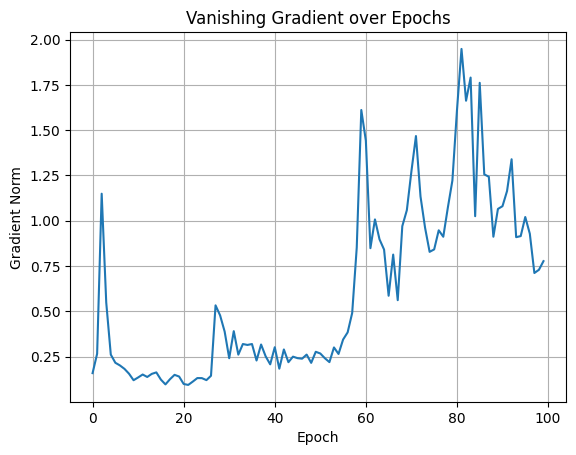

In [ ]:
plt.plot(gradient_norms)
plt.title("Vanishing Gradient over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.nn.utils.rnn import pad_sequence
from collections import Counter
import re

In [ ]:
custom_sentences = [
    ("What a wonderful and touching story!", "pos"),
    ("I hated every part of it. So boring and pointless.", "neg"),
    ("The narrative was fascinating and emotional.", "pos"),
    ("Awful. The characters made no sense at all.", "neg"),
    ("ONCE UPON A TIME there was a farmer...", "pos")
]

In [ ]:
df = pd.DataFrame(custom_sentences, columns=["text", "label"])

def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

df["text"] = df["text"].apply(preprocess)

In [ ]:
word_counts = Counter()
for sentence in df["text"]:
    word_counts.update(sentence.split())

vocab = {word: idx + 2 for idx, (word, _) in enumerate(word_counts.most_common())}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1

In [ ]:
# Преобразуем текст в индексы
def encode_sentence(sentence):
    return [vocab.get(word, vocab["<UNK>"]) for word in sentence.split()]

encoded_texts = [torch.tensor(encode_sentence(s)) for s in df["text"]]
padded_texts = pad_sequence(encoded_texts, batch_first=True, padding_value=vocab["<PAD>"])

# Кодируем метки
label_encoder = LabelEncoder()
labels = torch.tensor(label_encoder.fit_transform(df["label"]))

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(padded_texts, labels, test_size=0.2, random_state=42)


In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

In [ ]:
train_dataset = SentimentDataset(X_train, y_train)
test_dataset = SentimentDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2)


In [ ]:
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(RNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=vocab["<PAD>"])
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        output, hidden = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))


In [ ]:
vocab_size = len(vocab)
embed_dim = 64
hidden_dim = 128
output_dim = 2

model = RNNClassifier(vocab_size, embed_dim, hidden_dim, output_dim)

# Определим функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Обучение модели
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == targets).sum().item()

    accuracy = correct / len(train_dataset)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch 1/10, Loss: 1.3768, Accuracy: 0.5000
Epoch 2/10, Loss: 1.1089, Accuracy: 1.0000
Epoch 3/10, Loss: 0.8779, Accuracy: 1.0000
Epoch 4/10, Loss: 0.6504, Accuracy: 1.0000
Epoch 5/10, Loss: 0.4405, Accuracy: 1.0000
Epoch 6/10, Loss: 0.2410, Accuracy: 1.0000
Epoch 7/10, Loss: 0.1257, Accuracy: 1.0000
Epoch 8/10, Loss: 0.0608, Accuracy: 1.0000
Epoch 9/10, Loss: 0.0350, Accuracy: 1.0000
Epoch 10/10, Loss: 0.0194, Accuracy: 1.0000


In [ ]:
model.eval()
correct = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == targets).sum().item()

test_accuracy = correct / len(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")



Test Accuracy: 0.0000


новйы

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.nn.utils.rnn import pad_sequence
from collections import Counter
import re
import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
print("Path to dataset files:", path)
csv_path = path + "/IMDB Dataset.csv"
df = pd.read_csv(csv_path)

# Предобработка текста
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

df["review"] = df["review"].apply(preprocess)

# Токенизация
word_counts = Counter()
for sentence in df["review"]:
    word_counts.update(sentence.split())

vocab = {word: idx + 2 for idx, (word, _) in enumerate(word_counts.most_common(10000))}  # Ограничим словарь до 10000
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1

# Преобразуем текст в индексы
def encode_sentence(sentence):
    return [vocab.get(word, vocab["<UNK>"]) for word in sentence.split()]
encoded_texts = [torch.tensor(encode_sentence(s)) for s in df["review"][:5000]]
padded_texts = pad_sequence(encoded_texts, batch_first=True, padding_value=vocab["<PAD>"])

label_encoder = LabelEncoder()
labels = torch.tensor(label_encoder.fit_transform(df["sentiment"][:5000]))

X_train, X_test, y_train, y_test = train_test_split(padded_texts, labels, test_size=0.2, random_state=42)

# Класс Dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

# DataLoader
train_dataset = SentimentDataset(X_train, y_train)
test_dataset = SentimentDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(RNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=vocab["<PAD>"])
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        output, hidden = self.rnn(embedded)
        return self.fc(hidden.squeeze(0))

vocab_size = len(vocab)
embed_dim = 64
hidden_dim = 128
output_dim = 2

model = RNNClassifier(vocab_size, embed_dim, hidden_dim, output_dim)

# Определим функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == targets).sum().item()

    accuracy = correct / len(train_dataset)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}")

# Оценка на тесте
model.eval()
correct = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == targets).sum().item()

test_accuracy = correct / len(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews
Epoch 1/5, Loss: 43.7756, Accuracy: 0.4995
Epoch 2/5, Loss: 43.7520, Accuracy: 0.4905
Epoch 3/5, Loss: 43.6866, Accuracy: 0.4950
Epoch 4/5, Loss: 43.6821, Accuracy: 0.4945
Epoch 5/5, Loss: 43.6864, Accuracy: 0.4930
Test Accuracy: 0.4690


EXERCISE 6

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 - 112s - 447ms/step - accuracy: 0.8089 - loss: 0.4085 - val_accuracy: 0.8472 - val_loss: 0.3527
Epoch 2/3
250/250 - 111s - 445ms/step - accuracy: 0.9043 - loss: 0.2439 - val_accuracy: 0.8740 - val_loss: 0.3009
Epoch 3/3
250/250 - 140s - 561ms/step - accuracy: 0.9258 - loss: 0.1977 - val_accuracy: 0.8699 - val_loss: 0.3172
Epoch 1/3
250/250 - 123s - 492ms/step - accuracy: 0.7765 - loss: 0.4521 - val_accuracy: 0.8725 - val_loss: 0.3117
Epoch 2/3
250/250 - 142s - 566ms/step - accuracy: 0.8954 - loss: 0.2624 - val_accuracy: 0.8575 - val_loss: 0.3316
Epoch 3/3
250/250 - 144s - 574ms/step - accuracy: 0.9218 - loss: 0.2051 - val_accuracy: 0.8694 - val_loss: 0.3217

LSTM: Time = 395.80s, Accuracy = 0.8723
GRU:  Time = 408.77s, Accuracy = 0.8740


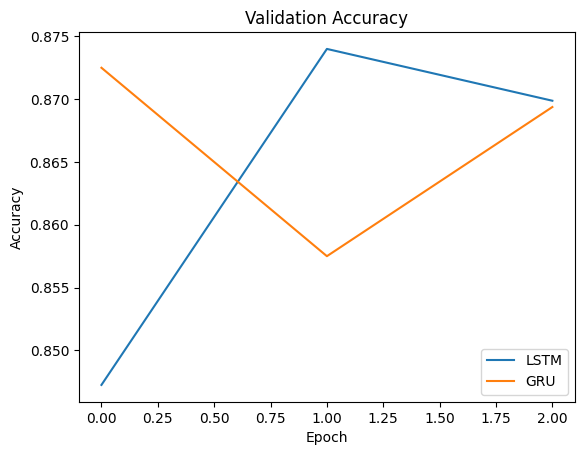

In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense

import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
print("Path to dataset files:", path)

csv_path = path + "/IMDB Dataset.csv"
df = pd.read_csv(csv_path)

# --- Предобработка текста ---
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)  # Удалить HTML-теги
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Удалить знаки препинания
    return text

df["review"] = df["review"].apply(clean_text)
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

x = df["review"].values
y = df["sentiment"].values

x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

max_words = 10000
maxlen = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train_raw)

x_train = tokenizer.texts_to_sequences(x_train_raw)
x_test = tokenizer.texts_to_sequences(x_test_raw)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

def create_model(cell_type='LSTM'):
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=maxlen))
    if cell_type == 'LSTM':
        model.add(LSTM(64))
    elif cell_type == 'GRU':
        model.add(GRU(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(cell_type='LSTM'):
    model = create_model(cell_type)
    start = time.time()
    history = model.fit(x_train, y_train,
                        epochs=3,
                        batch_size=128,
                        validation_split=0.2,
                        verbose=2)
    end = time.time()
    duration = end - start
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return duration, test_acc, history

# oбучение и сравнение
lstm_time, lstm_acc, lstm_hist = train_and_evaluate('LSTM')
gru_time, gru_acc, gru_hist = train_and_evaluate('GRU')

print(f"\nLSTM: Time = {lstm_time:.2f}s, Accuracy = {lstm_acc:.4f}")
print(f"GRU:  Time = {gru_time:.2f}s, Accuracy = {gru_acc:.4f}")

# --- Визуализация ---
plt.plot(lstm_hist.history['val_accuracy'], label='LSTM')
plt.plot(gru_hist.history['val_accuracy'], label='GRU')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


EXERCISE 7

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical
import string

path = tf.keras.utils.get_file("shakespeare.txt",
    "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt")

with open(path, 'r', encoding='utf-8') as f:
    text = f.read().lower()

text = ''.join([c for c in text if c in string.ascii_lowercase + ' .,;:\'\n'])

chars = sorted(list(set(text)))
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for i, c in enumerate(chars)}

seq_length = 40
step = 3
sentences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sentences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

X = np.zeros((len(sentences), seq_length), dtype=np.int32)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t] = char2idx[char]
    y[i, char2idx[next_chars[i]]] = 1

# модель генерации текста
model = Sequential([
    Embedding(len(chars), 64, input_length=seq_length),
    LSTM(128),
    Dense(len(chars), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy')

# Обучение
model.fit(X, y, batch_size=128, epochs=10)

#генерация текста
def generate_text(seed_text, length=200):
    generated = seed_text
    for _ in range(length):
        sampled = np.zeros((1, seq_length))
        for t, char in enumerate(seed_text[-seq_length:]):
            sampled[0, t] = char2idx.get(char, 0)
        preds = model.predict(sampled, verbose=0)[0]
        next_index = np.random.choice(len(chars), p=preds)
        next_char = idx2char[next_index]
        generated += next_char
        seed_text += next_char
    return generated

print("Generated Text:\n")
print(generate_text("to be, or not to be, that is the que"))


1115394/1115394 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Epoch 1/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 385s 132ms/step - loss: 2.3992
Epoch 2/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 430s 128ms/step - loss: 1.8114
Epoch 3/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 379s 127ms/step - loss: 1.6583
Epoch 4/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 381s 127ms/step - loss: 1.5803
Epoch 5/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 369s 128ms/step - loss: 1.5309
Epoch 6/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 362s 125ms/step - loss: 1.4950
Epoch 7/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 363s 126ms/step - loss: 1.4632
Epoch 8/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 382s 126ms/step - loss: 1.4426
Epoch 9/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 384s 126ms/step - loss: 1.4239
Epoch 10/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 383s 127ms/step - loss: 1.4090
Generated Text:

to be, or not to be, that is the quefhmtine.

cominius:
desider than nate, pike you dost her shell,
come, sir, what elislaling shame, blacies gallitatire
would is drecmetty an husly you still
not me

cla

In [5]:
print("Generated Text:\n")
print(generate_text("love"))

Generated Text:

loveevvcqvwpcptchmllerhhqrphlremmmsdltj
ha make gone well on's not, that stalless,
which you have pure pleased it hath him,
the fuel us a leave a possain with me shed not
and lones well straigless for don


In [6]:
print("Generated Text:\n")
print(generate_text("Happy"))

Generated Text:

Happylxxacvppihmepaiihmemrhbllehbmrwmpmaise:
he besedes, save that shane of the country
and not father, his fastit for my fault,
resiment unto then in that escer him, as be
drictand more may. how had thou,


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical
import string

# --- Загрузка текста ---
path = tf.keras.utils.get_file("shakespeare.txt",
    "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt")
with open(path, 'r', encoding='utf-8') as f:
    text = f.read().lower()

# --- Чистка текста ---
text = ''.join([c for c in text if c in string.ascii_lowercase + ' .,;:\'\n'])

# --- Словари символов ---
chars = sorted(list(set(text)))
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for i, c in enumerate(chars)}

# --- Подготовка данных ---
seq_length = 40
step = 3
sentences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sentences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

X = np.zeros((len(sentences), seq_length), dtype=np.int32)
y = np.zeros((len(sentences), len(chars)), dtype=bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t] = char2idx[char]
    y[i, char2idx[next_chars[i]]] = 1

# --- Модель ---
model = Sequential([
    Embedding(input_dim=len(chars), output_dim=64, input_length=seq_length),
    LSTM(128),
    Dense(len(chars), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.fit(X, y, batch_size=128, epochs=10)

# --- Функция генерации текста с любой длиной seed_text ---
def generate_text(seed_text, gen_length=300):
    seed_text = seed_text.lower()
    generated = seed_text

    for _ in range(gen_length):
        # Преобразуем seed_text в числовую последовательность
        input_seq = np.zeros((1, seq_length), dtype=np.int32)
        truncated = seed_text[-seq_length:]  # оставляем последние seq_length символов

        for t, char in enumerate(truncated.zfill(seq_length)):  # zfill не влияет на паддинг, только длину
            input_seq[0, t] = char2idx.get(char, 0)

        preds = model.predict(input_seq, verbose=0)[0]
        next_index = np.random.choice(len(chars), p=preds)
        next_char = idx2char[next_index]
        generated += next_char
        seed_text += next_char  # обновляем seed_text

    return generated

# --- Пример ---
print("Generated Text:\n")
print(generate_text("to be or not to be, that is the ", gen_length=400))


Epoch 1/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 392s 135ms/step - loss: 2.3994
Epoch 2/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 393s 136ms/step - loss: 1.8022
Epoch 3/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 423s 130ms/step - loss: 1.6509
Epoch 4/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 376s 128ms/step - loss: 1.5751
Epoch 5/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 380s 127ms/step - loss: 1.5233
Epoch 6/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 382s 127ms/step - loss: 1.4809
Epoch 7/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 384s 128ms/step - loss: 1.4594
Epoch 8/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 378s 126ms/step - loss: 1.4382
Epoch 9/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 385s 127ms/step - loss: 1.4173
Epoch 10/10
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 381s 127ms/step - loss: 1.4030
Generated Text:

to be or not to be, that is the it; rest,
we take hathing known that wert evern toust the night,
his ensoling lown and his flowers to under
that, sir, no, and goth you, rogain: my night, dost dost,
our of; your fair speak, sir, said doth roged you
that

In [8]:
print("Generated Text:\n")
print(generate_text("Love", gen_length=400))

Generated Text:

lovery both what.

pard:
what good stunt, good might, good; have not,
hole for that flutlep my each again.

second eyeng

hard elfward:
so, 'his 'mmore to them; this i am says:
and it be preseques, that have, fie, bressa shall
he claud of liege, and thee, may in this joy for;
fad ovand, he mad nod he satide not the power.

romeo:
were let profe, his day therewise of concy night by this suppers,
and lo


EXERCISE 8

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import kagglehub
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")
csv_path = path + "/IMDB Dataset.csv"
df = pd.read_csv(csv_path)

texts = df['review'].values
labels = (df['sentiment'] == 'positive').astype(int).values

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
maxlen = 200
X = pad_sequences(sequences, maxlen=maxlen)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

embedding_dim = 64
batch_size = 128
epochs = 3

#LSTM
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
model_lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)
lstm_time = time.time() - start_time
lstm_acc = model_lstm.evaluate(X_test, y_test)[1]

print(f"\nLSTM: Time = {lstm_time:.2f}s, Accuracy = {lstm_acc:.4f}")

#Bidirectional LSTM
model_bilstm = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
model_bilstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)
bilstm_time = time.time() - start_time
bilstm_acc = model_bilstm.evaluate(X_test, y_test)[1]

print(f"\nBiLSTM: Time = {bilstm_time:.2f}s, Accuracy = {bilstm_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
282/282 ━━━━━━━━━━━━━━━━━━━━ 107s 368ms/step - accuracy: 0.6665 - loss: 0.5670 - val_accuracy: 0.8618 - val_loss: 0.3485
Epoch 2/3
282/282 ━━━━━━━━━━━━━━━━━━━━ 141s 367ms/step - accuracy: 0.9009 - loss: 0.2521 - val_accuracy: 0.8842 - val_loss: 0.2886
Epoch 3/3
282/282 ━━━━━━━━━━━━━━━━━━━━ 139s 357ms/step - accuracy: 0.9263 - loss: 0.1981 - val_accuracy: 0.8755 - val_loss: 0.2959
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8843 - loss: 0.2771

LSTM: Time = 428.88s, Accuracy = 0.8854
Epoch 1/3
282/282 ━━━━━━━━━━━━━━━━━━━━ 190s 657ms/step - accuracy: 0.7056 - loss: 0.5389 - val_accuracy: 0.8777 - val_loss: 0.2929
Epoch 2/3
282/282 ━━━━━━━━━━━━━━━━━━━━ 198s 643ms/step - accuracy: 0.9080 - loss: 0.2365 - val_accuracy: 0.8597 - val_loss: 0.3274
Epoch 3/3
282/282 ━━━━━━━━━━━━━━━━━━━━ 184s 652ms/step - accuracy: 0.9258 - loss: 0.1934 - val_accuracy: 0.8788 - val_loss: 0.3426
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8842 - loss: 0.3178

BiLSTM: Time = 571